# Ford GoBike Data Analysis (Part 1)
## by Aluko Bamidele 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#preliminary">Preliminary Wrangling</a></li>
<li><a href="#univariate">Univariate Exploration</a></li>
<li><a href="#bivariate">Bivariate Exploration</a></li>
<li><a href="#multivariate">Multivariate Exploration</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>


<a id='intro'></a>
## Introduction

A bike-sharing system is a shared transport service in which bicycles are made available for shared use to individuals on a short-term basic for a price. (https://en.wikipedia.org/wiki/Bicycle-sharing_system)

In this projet, we want to demostrate the value and importance of data visualization techniques in the data analysis process. First the data will be explore before visualization is been carried out. The data set to analyse is a data set that includes information about individual rides made in a bike-sharing system covering the greater San-Francisco bay area.

In the first part of this project, we will use python visualization libraries to wrangle and also explore the data file. we will be creating plot with a single variable down to plots with multiple variables.

In the second part, we will be presenting the insight found from the analysis in part one in form of slides.

The insight I intended to gain from this analysis are:
 - When are most trips taken in terms of time of day, day of the week?
 - How long does the average trip take?
 - Does the above depend on if a user is a subscriber or customer?


<a id='preliminary'></a>
## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from timeit import default_timer as timer
import re
%matplotlib inline

In [2]:
#Load in data Set
bike_trip = pd.read_csv('201902-fordgobike-tripdata.csv')
bike_trip.head()

duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-02-28 23:54:18.5490  2019-03-01 00:20:44.0740   

   start_station_id                                start_station_name  \
0              21.0  Montgomery St BART Station (Market St at 2nd St)   
1              23.0                     The Embarcadero at Steuart St   
2              86.0                           Market St at Dolores St   
3             375.0                           Grove St at Masonic Ave   
4               7.0                               Frank H Ogawa Plaza   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.789625              -122.400811            13.0   
1               37.791464              -122.391034            81.0   
2               37.769305              -122.426826             3.0   
3               37.774836              -122.446546            70.0   
4               37.804562              -122.271738           222.0   

                               end_station_name  end_station_latitude  \
0                Commercial St at Montgomery St             37.794231   
1                            Berry St at 4th St             37.775880   
2  Powell St BART Station (Market St at 4th St)             37.786375   
3                        Central Ave at Fell St             37.773311   
4                         10th Ave at E 15th St             37.792714   

   end_station_longitude  bike_id   user_type  member_birth_year  \
0            -122.402923     4902    Customer             1984.0   
1            -122.393170     2535    Customer                NaN   
2            -122.404904     5905    Customer             1972.0   
3            -122.444293     6638  Subscriber             1989.0   
4            -122.248780     4898  Subscriber             1974.0   

  member_gender bike_share_for_all_trip  
0          Male                      No  
1           NaN                      No  
2          Male                      No  
3         Other                      No  
4          Male                     Yes

## Cleaning of Data

In [3]:
# make a copy of original data set
df_trip = bike_trip.copy()

In [4]:
df_trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
df_trip.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

### Issue

Start_time and end_time data type are not in the appropriate datatype

### Define

Change start_time  data type to a datetype data

### Code

In [6]:
#changing data-type of start_time and end_time to datetime and others to proper data type .

df_trip.start_time = pd.to_datetime(df_trip.start_time)
df_trip.end_time = pd.to_datetime(df_trip.end_time)
df_trip['user_type'] = df_trip['user_type'].astype('category')
df_trip['member_gender'] = df_trip['member_gender'].astype('category')

### Test

In [7]:
df_trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

Start_time and end_time data type are now in the appropriate datatype.

### Issue

Incomplete data

### Define

Age and gender contain null values that needs to be drop

### Code

In [8]:
#Drop Start station with null value

df_trip = df_trip.dropna(subset=['member_gender'])

### Test

In [9]:
df_trip.isnull().sum()

duration_sec                 0
start_time                   0
end_time                     0
start_station_id           195
start_station_name         195
start_station_latitude       0
start_station_longitude      0
end_station_id             195
end_station_name           195
end_station_latitude         0
end_station_longitude        0
bike_id                      0
user_type                    0
member_birth_year            0
member_gender                0
bike_share_for_all_trip      0
dtype: int64

In [10]:
substring = 'Other'
df_trip[df_trip.apply(lambda row: row.astype(str).str.contains(substring, case=False).any(),
                                  axis=1)]

duration_sec              start_time                end_time  \
3              36490 2019-02-28 17:54:26.010 2019-03-01 04:02:36.842   
8               1570 2019-02-28 23:41:48.790 2019-03-01 00:07:59.715   
131             1187 2019-02-28 22:39:58.560 2019-02-28 22:59:46.206   
135              544 2019-02-28 22:48:12.730 2019-02-28 22:57:17.080   
190              515 2019-02-28 22:28:11.347 2019-02-28 22:36:46.389   
...              ...                     ...                     ...   
183346           312 2019-02-01 02:06:04.566 2019-02-01 02:11:17.122   
183349           527 2019-02-01 01:48:54.755 2019-02-01 01:57:42.540   
183378           659 2019-02-01 00:53:36.143 2019-02-01 01:04:35.371   
183381           426 2019-02-01 00:48:54.159 2019-02-01 00:56:00.474   
183389           184 2019-02-01 00:43:56.556 2019-02-01 00:47:01.009   

        start_station_id           start_station_name  start_station_latitude  \
3                  375.0      Grove St at Masonic Ave               37.774836   
8                   10.0   Washington St at Kearny St               37.795393   
131                262.0    West St at University Ave               37.869967   
135                356.0  Valencia St at Clinton Park               37.769188   
190                 58.0         Market St at 10th St               37.776619   
...                  ...                          ...                     ...   
183346             175.0     49th St at Telegraph Ave               37.835946   
183349             213.0        32nd St at Adeline St               37.823847   
183378              47.0        4th St at Harrison St               37.780955   
183381             230.0      14th St at Mandela Pkwy               37.810743   
183389              66.0        3rd St at Townsend St               37.778742   

        start_station_longitude  end_station_id  \
3                   -122.446546            70.0   
8                   -122.404770           127.0   
131                 -122.286533           240.0   
135                 -122.422285            34.0   
190                 -122.417385           321.0   
...                         ...             ...   
183346              -122.262366           166.0   
183349              -122.281193           158.0   
183378              -122.399749            67.0   
183381              -122.291415           213.0   
183389              -122.392741            47.0   

                                         end_station_name  \
3                                  Central Ave at Fell St   
8                                  Valencia St at 21st St   
131                             Haste St at Telegraph Ave   
135                        Father Alfred E Boeddeker Park   
190                                      5th St at Folsom   
...                                                   ...   
183346                        College Ave at Alcatraz Ave   
183349                      Shattuck Ave at Telegraph Ave   
183378  San Francisco Caltrain Station 2  (Townsend St...   
183381                              32nd St at Adeline St   
183389                              4th St at Harrison St   

        end_station_latitude  end_station_longitude  bike_id   user_type  \
3                  37.773311            -122.444293     6638  Subscriber   
8                  37.756708            -122.421025     6548  Subscriber   
131                37.866043            -122.258804     5649  Subscriber   
135                37.783988            -122.412408     6065  Subscriber   
190                37.780146            -122.403071     5234  Subscriber   
...                      ...                    ...      ...         ...   
183346             37.851376            -122.252523     5450  Subscriber   
183349             37.833279            -122.263490     1172  Subscriber   
183378             37.776639            -122.395526     4960  Subscriber   
183381             37.823847            -122.281193     3535  Su

### Issue

Trip Duration to hours

### Define

Extract convert durations to minutes and hours

### Code

In [11]:
#Convert durations in seconds to hours in a new columns each.

df_trip['duration_min']=(df_trip['duration_sec']/60).round(decimals=1)
df_trip['duration_hrs']=(df_trip['duration_min']/60).round(decimals=1)
df_trip.head()

duration_sec              start_time                end_time  \
0         52185 2019-02-28 17:32:10.145 2019-03-01 08:01:55.975   
2         61854 2019-02-28 12:13:13.218 2019-03-01 05:24:08.146   
3         36490 2019-02-28 17:54:26.010 2019-03-01 04:02:36.842   
4          1585 2019-02-28 23:54:18.549 2019-03-01 00:20:44.074   
5          1793 2019-02-28 23:49:58.632 2019-03-01 00:19:51.760   

   start_station_id                                start_station_name  \
0              21.0  Montgomery St BART Station (Market St at 2nd St)   
2              86.0                           Market St at Dolores St   
3             375.0                           Grove St at Masonic Ave   
4               7.0                               Frank H Ogawa Plaza   
5              93.0                      4th St at Mission Bay Blvd S   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.789625              -122.400811            13.0   
2               37.769305              -122.426826             3.0   
3               37.774836              -122.446546            70.0   
4               37.804562              -122.271738           222.0   
5               37.770407              -122.391198           323.0   

                               end_station_name  end_station_latitude  \
0                Commercial St at Montgomery St             37.794231   
2  Powell St BART Station (Market St at 4th St)             37.786375   
3                        Central Ave at Fell St             37.773311   
4                         10th Ave at E 15th St             37.792714   
5                            Broadway at Kearny             37.798014   

   end_station_longitude  bike_id   user_type  member_birth_year  \
0            -122.402923     4902    Customer             1984.0   
2            -122.404904     5905    Customer             1972.0   
3            -122.444293     6638  Subscriber             1989.0   
4            -122.248780     4898  Subscriber             1974.0   
5            -122.405950     5200  Subscriber             1959.0   

  member_gender bike_share_for_all_trip  duration_min  duration_hrs  
0          Male                      No         869.8          14.5  
2          Male                      No        1030.9          17.2  
3         Other                      No         608.2          10.1  
4          Male                     Yes          26.4           0.4  
5          Male                      No          29.9           0.5

### Issue

Day,date and time combine 

### Define

Isolate Date, Day, Time to individual column

### Code

In [12]:
# Creating a new column to get the start day.

df_trip['start_day']=df_trip['start_time'].dt.dayofweek
days= {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
df_trip['start_day'] =df_trip['start_day'].apply(lambda x: days[x])

### Test

In [13]:
df_trip.head(3)

duration_sec              start_time                end_time  \
0         52185 2019-02-28 17:32:10.145 2019-03-01 08:01:55.975   
2         61854 2019-02-28 12:13:13.218 2019-03-01 05:24:08.146   
3         36490 2019-02-28 17:54:26.010 2019-03-01 04:02:36.842   

   start_station_id                                start_station_name  \
0              21.0  Montgomery St BART Station (Market St at 2nd St)   
2              86.0                           Market St at Dolores St   
3             375.0                           Grove St at Masonic Ave   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.789625              -122.400811            13.0   
2               37.769305              -122.426826             3.0   
3               37.774836              -122.446546            70.0   

                               end_station_name  end_station_latitude  \
0                Commercial St at Montgomery St             37.794231   
2  Powell St BART Station (Market St at 4th St)             37.786375   
3                        Central Ave at Fell St             37.773311   

   end_station_longitude  bike_id   user_type  member_birth_year  \
0            -122.402923     4902    Customer             1984.0   
2            -122.404904     5905    Customer             1972.0   
3            -122.444293     6638  Subscriber             1989.0   

  member_gender bike_share_for_all_trip  duration_min  duration_hrs start_day  
0          Male                      No         869.8          14.5  Thursday  
2          Male                      No        1030.9          17.2  Thursday  
3         Other                      No         608.2          10.1  Thursday

### Issue

Day,date and time combine 

### Define

Calculate age from date of birth 

### Code

In [14]:
df_trip['age']=(2019 - df_trip['member_birth_year']).round()
# convert to integer
df_trip['age'] = df_trip['age'].astype('int')

### Test

In [15]:
df_trip.head()

duration_sec              start_time                end_time  \
0         52185 2019-02-28 17:32:10.145 2019-03-01 08:01:55.975   
2         61854 2019-02-28 12:13:13.218 2019-03-01 05:24:08.146   
3         36490 2019-02-28 17:54:26.010 2019-03-01 04:02:36.842   
4          1585 2019-02-28 23:54:18.549 2019-03-01 00:20:44.074   
5          1793 2019-02-28 23:49:58.632 2019-03-01 00:19:51.760   

   start_station_id                                start_station_name  \
0              21.0  Montgomery St BART Station (Market St at 2nd St)   
2              86.0                           Market St at Dolores St   
3             375.0                           Grove St at Masonic Ave   
4               7.0                               Frank H Ogawa Plaza   
5              93.0                      4th St at Mission Bay Blvd S   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.789625              -122.400811            13.0   
2               37.769305              -122.426826             3.0   
3               37.774836              -122.446546            70.0   
4               37.804562              -122.271738           222.0   
5               37.770407              -122.391198           323.0   

                               end_station_name  end_station_latitude  \
0                Commercial St at Montgomery St             37.794231   
2  Powell St BART Station (Market St at 4th St)             37.786375   
3                        Central Ave at Fell St             37.773311   
4                         10th Ave at E 15th St             37.792714   
5                            Broadway at Kearny             37.798014   

   end_station_longitude  bike_id   user_type  member_birth_year  \
0            -122.402923     4902    Customer             1984.0   
2            -122.404904     5905    Customer             1972.0   
3            -122.444293     6638  Subscriber             1989.0   
4            -122.248780     4898  Subscriber             1974.0   
5            -122.405950     5200  Subscriber             1959.0   

  member_gender bike_share_for_all_trip  duration_min  duration_hrs start_day  \
0          Male                      No         869.8          14.5  Thursday   
2          Male                      No        1030.9          17.2  Thursday   
3         Other                      No         608.2          10.1  Thursday   
4          Male                     Yes          26.4           0.4  Thursday   
5          Male                      No          29.9           0.5  Thursday   

   age  
0   35  
2   47  
3   30  
4   45  
5   60

In [16]:
# Seperating the Dates and time to seperate column
df_trip['time'] = pd.to_datetime(df_trip["start_time"])
df_trip['dates'] = df_trip['start_time'].dt.date
df_trip['hour'] = df_trip['time'].dt.hour


In [17]:
df_trip.shape

(175147, 23)

In [18]:
df_trip.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175147 entries, 0 to 183411
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             175147 non-null  int64         
 1   start_time               175147 non-null  datetime64[ns]
 2   end_time                 175147 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   175147 non-null  float64       
 6   start_station_longitude  175147 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     175147 non-null  float64       
 10  end_station_longitude    175147 non-null  float64       
 11  bike_id                  175147 non-null  int64         
 12  user_type       

### What is the structure of your dataset?

> There are 175147 rows of fordgobike trips in the dataset with 16 original specifications (duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude ,end_station_longitude, bike_id, user_type, member_birth_year, member_gender, bike_share_for_all_trip). During the cleaning process, new column where introduce which is as a result of isolating information from the data. new colums includes duration_min, duration_hrs, start_day, age.  This makes a total of 20 Out of 16 specifications 2 are datetime datatype, 9 are numerical, 4 are object type and 1 is boolean type.

### What is/are the main feature(s) of interest in your dataset?

> I am looking forward to how duration of trips is dependent on other varibles in the dataset. Another point of interest for me is the bike_share_for_all_trip. looking forward to see which effect it hass on other variables.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect age and user type to have strong effect on the durations. 
From the dataset, Age, start and end station might likely affect the duration of each trip recorded in the data set. invarable the duration will depend on the start and end station.

<a id='univariate'></a>
## Univariate Exploration

In this section, i will be investigating  distributions of individual variables starting with categorical variable then numerical vairables.

### *Bike Sharing for all Trip Distribution

In [19]:
color = sns.color_palette()[0]
plt.figure(figsize=(12, 7))
sns.countplot(data = df_trip, x ='bike_share_for_all_trip', color=color)

sns.set_style('darkgrid')
plt.xlabel('Bike Share', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title('Bike Sharing Distribution', fontsize=20)

Text(0.5, 1.0, 'Bike Sharing Distribution')

In [20]:
color = sns.color_palette()[0]
def myFrequencyPlot(df, xVar):
    #plot Dimensions
    plt.figure(figsize=[12,7])
    
    #plot
    sns.countplot(data=df, x=xVar, color=color);
    
    #Title
    plt.title(f'''Distribution of {xVar}'''.title(), fontsize=18, weight='bold')
    plt.xlabel(xVar.title(), fontsize=15, weight='bold')
    plt.ylabel('Frequency'.title(), fontsize=15, weight='bold')

In [21]:
myFrequencyPlot(df_trip,'bike_share_for_all_trip' )

In [22]:
df_trip['bike_share_for_all_trip'].value_counts()

No     157788
Yes     17359
Name: bike_share_for_all_trip, dtype: int64

In [23]:
df_trip['bike_share_for_all_trip'].value_counts(normalize=True)*100

No     90.088897
Yes     9.911103
Name: bike_share_for_all_trip, dtype: float64

From the chart and information above, we can see that **157788(90%) user** do not use the bike sharing system for all trips and less **17359(9.9%) user** uses the bike sharing system for all trip.

### *Gender Distribution

In [24]:
myFrequencyPlot(df_trip,'member_gender' )

In [25]:
# get the value count of gender
print(pd.DataFrame(df_trip['member_gender'].value_counts()))

#get percentage value
print(pd.DataFrame(df_trip['member_gender'].value_counts(normalize=True)*100))

        member_gender
Male           130651
Female          40844
Other            3652
        member_gender
Male        74.595054
Female      23.319840
Other        2.085106


 The chart above shows that there are a large number of male compare to the female. The number of **male users is 130651(74.5%)** while that of female is **40844(23.3%)** that use the bike sharing system for the month. The volume of male is over 3 time that of the female users. it is also noted that some users are recorded as others, a significant 2%. this might be as a result of record error. We will be looking at further exploration of this gender variable in respect to duration spent on trip.

### *User Type Distribution

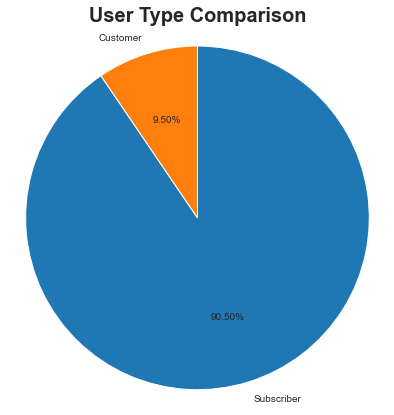

In [26]:
# Show user type by it's percentage
plt.figure(figsize=(12,7))
sorted_counts = df_trip['user_type'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False, autopct='%1.2f%%');
plt.axis('square')
plt.title('User Type Comparison', fontsize=20, weight='bold');

In [27]:
df_trip.user_type.value_counts()


Subscriber    158516
Customer       16631
Name: user_type, dtype: int64

In [28]:
df_trip.user_type.value_counts().sum()

175147

From the chat above, we can see that from the total entry of **175147** row in 2019 data, **15856(90.5 percent)** of users are Subscribers while the remaining **16631(9.5%)** are customers. We can see a ratio of 1 to 10 between the customers and subscribers



### *Daily Distrubution of the service usage?*

In [29]:
# write a function that accepts all labels
def label(x, y, t):
    plt.xlabel(x ,fontsize=15, weight='bold')
    plt.ylabel(y, fontsize=15, weight='bold')
    plt.title(t,fontsize=18,weight='bold'), 
    #plt.legend(loc='upper right')
    plt.show()
    


In [30]:
df_trip['weekday_number'] = pd.DatetimeIndex(df_trip['dates']).weekday
df_trip['weekday_names'] = pd.DatetimeIndex(df_trip['dates']).day_name()

#days= {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
#df['start_day'] =df['start_day'].apply(lambda x: days[x])

df_combine = (df_trip.groupby(['weekday_number', 'weekday_names']).size().reset_index(name="days"))
df_combine

df_combine.plot.bar(x="weekday_names", y="days", color='blue', figsize= (12,7), width = 0.8, title='Daily');
label('Days of week', 'Counts','Daily Distribution')

From the chat above, shows the daily distribution of service usage. The Usage of this services is**high on the weekday** and **less on the weekends.** Thursday has the peck usage.



### *Hourly Distribution of  Daily use?*

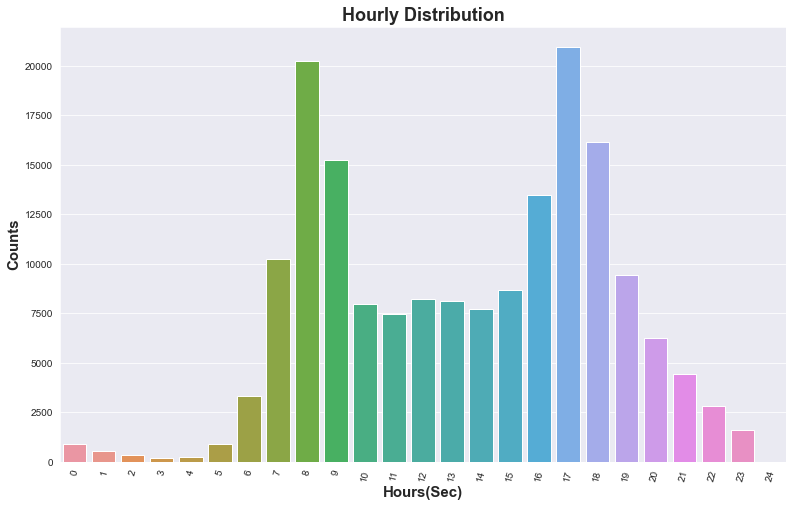

In [31]:
plt.figure(figsize=(13,8))
hour_dist = df_trip['hour'].value_counts().index
orders = np.arange(0,25)
sns.countplot(data=df_trip, x='hour', order=orders)
plt.xticks(rotation=75)
label('Hours(Sec)', 'Counts','Hourly Distribution')

In [32]:
df_trip['hour'].value_counts()

17    20921
8     20242
18    16133
9     15221
16    13492
7     10235
19     9432
15     8657
12     8237
13     8118
10     7980
14     7694
11     7473
20     6220
21     4401
6      3294
22     2793
23     1573
0       893
5       866
1       525
2       356
4       227
3       164
Name: hour, dtype: int64

From the Above chart, we can see that the  usage is  high during the peak hours of the day.**8am in the morning and 5pm in the evning.** This might be as a result of users, using the bike system to transit between stations while going to work or returning home.

### *Most Used Start Station*

In [33]:
# Move somewhere down
stations=df_trip.start_station_name .value_counts(ascending=True)
stations.tail(10).plot(kind='barh', figsize= (10,6))
label("","Counts",'Most used Start Stations')


### *Most Used Start Station*

In [34]:
stations=df_trip.end_station_name .value_counts(ascending=True)
stations.tail(10).plot(kind='barh', figsize= (10,6))
label("","Counts",'Most used End Stations')



The two chart above shows the most busiest stations. **Market st at 10th st** and **San Francisco Caltron Station 2** are on top of the chart.the **Market st at 10th st** has over **3500** trip initiating from the station while **San Francisco Caltron Station 2** has a little **less than 3500** rides initiating from the station.There is an alternate in position between the two station. **Market st at 10th st** is on top of the list in the most used start stations and came second in the most used end station.

### *Distribution of Trips in minutes*

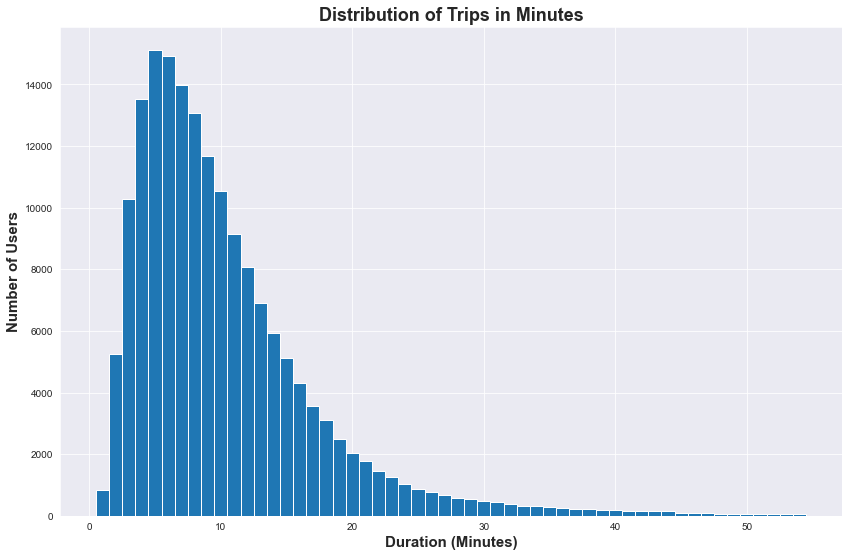

In [35]:
bins =np.arange(0.5,55, 1 )
plt.figure(figsize=[14, 9])
plt.hist(data = df_trip, x = 'duration_min', bins = bins)

label('Duration (Minutes)','Number of Users','Distribution of Trips in Minutes')


In [36]:
df_trip.duration_min.describe()

count    175147.000000
mean         11.736777
std          27.360090
min           1.000000
25%           5.400000
50%           8.500000
75%          13.200000
max        1409.100000
Name: duration_min, dtype: float64

The histogram plot gives  insight into the distribution of trip duration in minutes. The chart shows that most user who spend 5 minutes on the trip has over 15000 counts. The statistical data shows that the average minutes spent on the entire trips is 11.7. 

### *Distribution by User Age*

In [37]:
df_trip['age'].max()

141

In [38]:
df_trip.age.value_counts()

31     10236
26      9325
30      8972
29      8658
28      8498
       ...  
91         1
141        1
89         1
109        1
92         1
Name: age, Length: 75, dtype: int64

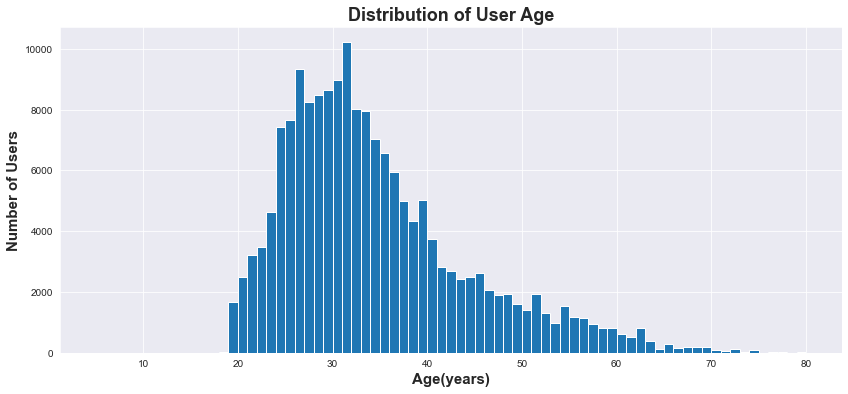

In [39]:
bins =np.arange(5, 81, 1 )
plt.figure(figsize=[14, 6])
plt.hist(data = df_trip.dropna(), x = 'age', bins = bins)

label('Age(years)', 'Number of Users', 'Distribution of User Age')



In [40]:
df_trip['age'].value_counts()

31     10236
26      9325
30      8972
29      8658
28      8498
       ...  
91         1
141        1
89         1
109        1
92         1
Name: age, Length: 75, dtype: int64

In [41]:
df_trip['age'].value_counts(normalize=True)*100

31     5.844234
26     5.324099
30     5.122554
29     4.943276
28     4.851924
         ...   
91     0.000571
141    0.000571
89     0.000571
109    0.000571
92     0.000571
Name: age, Length: 75, dtype: float64

The chart above gives us  insight into the distribution of users age. The chart shows that a large number of users are between the age distribution of age 20 to 40 years. **Age 31 has the peak number of 10236(5.8%)user** of the overall users followed by **age 26 with 9325(5,32%)** of the entire users. In our further exploration, we will see if age variable has any significant effect in relation to other variables. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The duration of trip distribution is symmetric or skewed distribution.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Age was gotten by subtracting the birth year from the year the data was collected to get the actual age of the rider as at taking the ride.

<a id='bivariate'></a>
## Bivariate Exploration

In this section, i investigate relationships between pairs of variables in the data set. we will be look at the relationship between categorical data and numerical data.

### *Bike Sharing Usage by Day*

In [42]:
df_plot = df_trip.groupby(['user_type', 'weekday_names']).size()
df_plot

user_type   weekday_names
Customer    Friday            2545
            Monday            2324
            Saturday          2183
            Sunday            2304
            Thursday          2875
            Tuesday           2283
            Wednesday         2117
Subscriber  Friday           25137
            Monday           23362
            Saturday         12259
            Sunday           12228
            Thursday         30858
            Tuesday          28333
            Wednesday        26339
dtype: int64

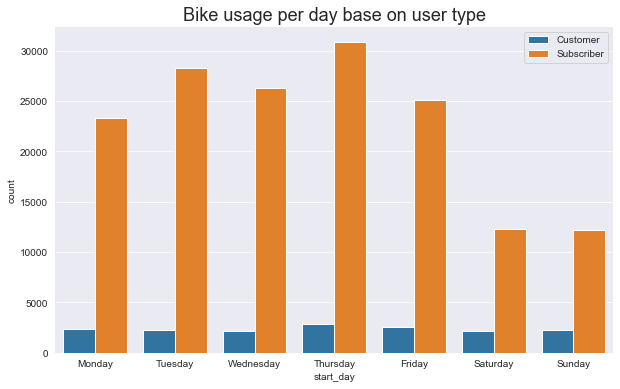

In [43]:
plt.figure(figsize=(10,6))
plt.title('Bike usage per day base on user type', fontsize=18)
day_name = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
sns.countplot(data=df_trip, x='start_day', order=day_name, hue='user_type')

# Remove legend title
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=False, offset=None, trim=False)
plt.gca().legend().set_title('');

The chart above shows the relationship between the user type and their usage each day of the week. The usage of the services  by suscribers are high compare to the customers. The use of the services by the subscribers are high on the weekdays and decreases on the weekend. while that of the customers are almost the same with a slight increase on thursday.

### *Service usage by hours*

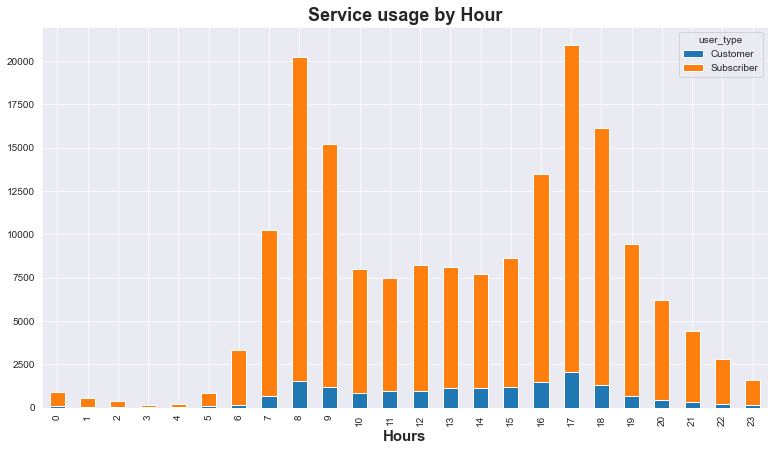

In [44]:

df_plot = df_trip.groupby(['user_type', 'hour']).size().reset_index().pivot(columns='user_type', index='hour', values=0)
df_plot.plot(kind='bar', stacked=True, figsize=(13,7), )
plt.title('Service usage by hour', fontsize=18)
label('Hours', '', 'Service usage by Hour')


The chart above shows the relationship between the user type and the usage of the services by hours. The usage of the services  by suscribers are high compare to the customers. The use of the services by the subscribers are high during the peak hours. THough that of the customers seems to maintian almost same level, there is also a slight increase during the peak hours also. **This can be said that being a suscriber to the services has great influene in the usage of the services.**

Most of the subscribers  and customers uses the services at peak hours. peack hours in the morning and evening hours.

### *Relationship between Member Gender and User Type*

In [45]:
plt.figure(figsize = (12,8))
df_plot = df_trip.groupby(['member_gender', 'user_type']).size()
df_plot= df_plot.reset_index(name='count')
df_plot= df_plot.pivot(index='member_gender', columns='user_type', values='count')
sns.heatmap(df_plot, annot = True, fmt = '.1f', cmap = 'viridis_r');
label('User Type', 'Member Gender', 'User Type Vs Member Gender')



In [46]:
# let's use groupby to compare data plan and churn value counts
print(pd.DataFrame(df_trip.groupby('member_gender')['user_type'].value_counts()))

# let's get the percentage
print(pd.DataFrame(df_trip.groupby('member_gender')['user_type'].value_counts(normalize=True)*100))

                          user_type
member_gender                      
Female        Subscriber      36197
              Customer         4647
Male          Subscriber     119122
              Customer        11529
Other         Subscriber       3197
              Customer          455
                          user_type
member_gender                      
Female        Subscriber  88.622564
              Customer    11.377436
Male          Subscriber  91.175728
              Customer     8.824272
Other         Subscriber  87.541073
              Customer    12.458927


The heat map and info above shows the relation between  member gender and  user type. The male suscriber has the higest count of **119122(91%)** compare to the female suscriber of with **36197(88.6%)**. The ratio of male suscriber to customers is 12 subscriber to ratio of 1 customer. In comparison to that of the female, the ration is 8 subscribers to 1 customers.

 ### *Relationship between Age and Duration*

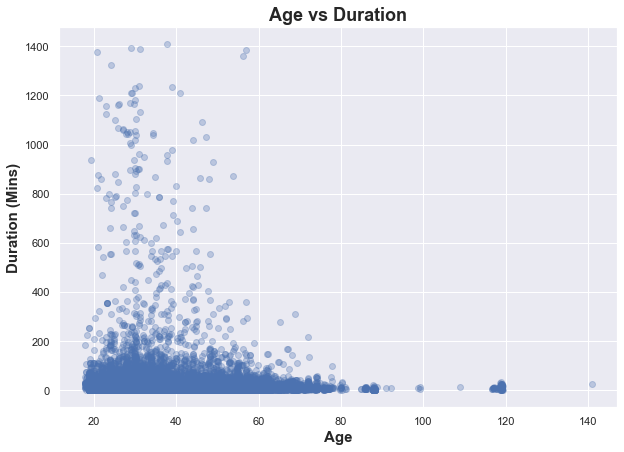

In [47]:
sns.set(rc={"figure.figsize":(10, 7)})
sns.regplot(data=df_trip, x='age', y='duration_min', x_jitter=0.3, fit_reg=False, scatter_kws={'alpha':0.3})
label('Age', 'Duration (Mins)', 'Age vs Duration')



The plot above shows the correlation between age and time spent on trips. There is a positive correlation between these two variable. we notice that there is a decline in duration of trip from a little above 45 age. **It can be said that age is a factor to the duration spent on trip**

 ### *Relationship between share trip and Duration*

In [48]:
plt.figure(figsize = [8, 5])
base_color = sns.color_palette()[0]
sns.boxplot(data = df_trip, x = 'bike_share_for_all_trip', y = 'duration_sec', color = base_color)
plt.ylim([-10, 1500])
label('Shared Trip', 'Duration(sec)', 'Shared Trip Vs Duration')


The box plot above show that despite not using the bike sharing system for all trip, the duration covered is high compare to those using it for all trip.

### *Relationship between Gender and Duration*

In [49]:
plt.figure(figsize = [8, 5])
base_color = sns.color_palette()[2]
sns.boxplot(data = df_trip, x = 'member_gender', y = 'duration_sec', color = base_color)
plt.ylim([-10, 1500])
label('Gender', 'Duration(Sec)', 'Gender Vs Duration')


As erlier seen in previous plot above,  the volume of male riders are high compare to the female riders. Comparing the gender variable with the duration covered,  it show that female riders engage in longer trips that the males. It is also seen that most persons whose gender are not recorded as either male or female also covered longer distance. This shows the inaccuracy of the gender data.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

>It can be seen that trip duration is dependant on age of each member. It can also be seen that been a suscriber promote the usage of the services.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> I expected variables with high values to have higher distribution but that is not the cas with gender variable. Though the male gender has a high volumn compare to the female but interestingly, the female engaged in longer trips that the male.

<a id='multivariate'></a>
## Multivariate Exploration

Here we will be plotting plots of three or more variables to investigate our data even
further. 

### *Relationship between the age, duration and gender*

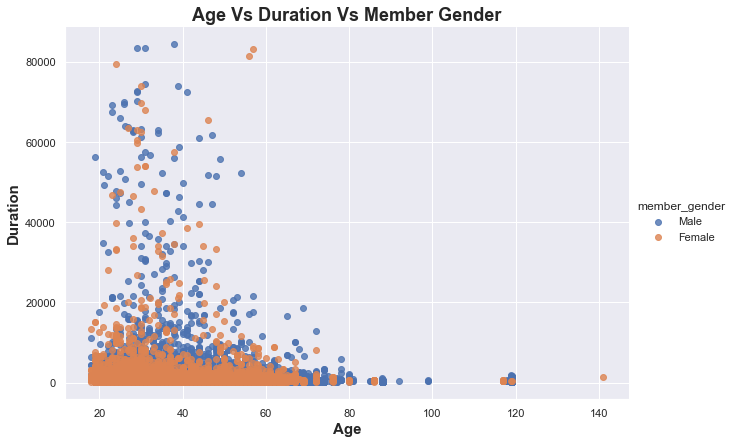

In [50]:
g = sns.FacetGrid(data = df_trip, hue = 'member_gender', hue_order=['Male', 'Female'], height=6, aspect=1.5)
g = g.map(sns.regplot, 'age', 'duration_sec', x_jitter = 0.04, fit_reg = False);
g.add_legend()
label('Age', 'Duration', 'Age Vs Duration Vs Member Gender')

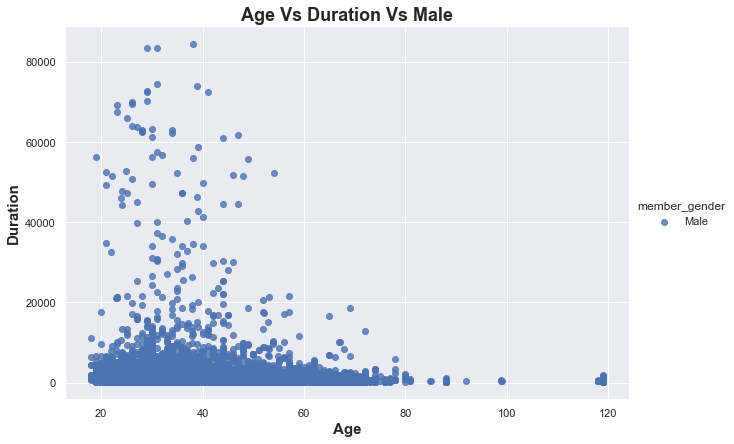

In [51]:
g = sns.FacetGrid(data = df_trip, hue = 'member_gender', hue_order=['Male', ''], height=6, aspect=1.5)
g = g.map(sns.regplot, 'age', 'duration_sec', x_jitter = 0.04, fit_reg = False);
g.add_legend()
label('Age', 'Duration', 'Age Vs Duration Vs Male')


In [52]:
g = sns.FacetGrid(data = df_trip, hue = 'member_gender', hue_order=['', 'Female'], height=6, aspect=1.5)
g = g.map(sns.regplot, 'age', 'duration_sec', x_jitter = 0.04, fit_reg = False);
g.add_legend()
label('Age', 'Duration', 'Age Vs Duration Vs Female')

The two plot above shows a similar trend. But is it observe that the male gender shows a slight volumn of male users that went abouve 40000 seconds of trip compare to the female chart. Comparing the volumn of male to female participant, i can be said that Gender does not have much effect on the usage  duration rather age does.

### *Relationship between the age, duration and user type*

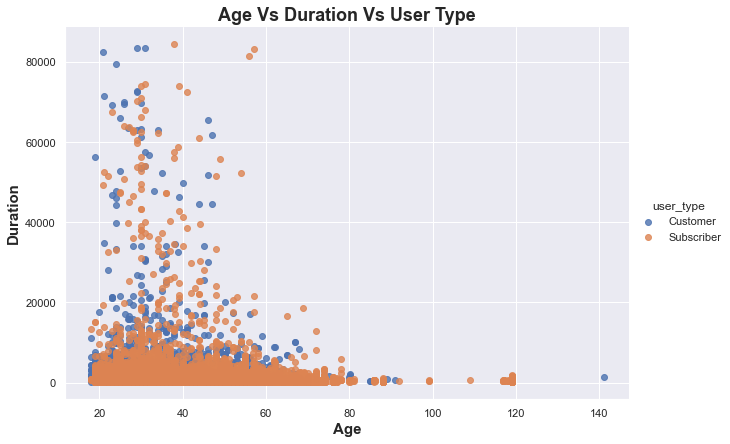

In [53]:
g = sns.FacetGrid(data = df_trip, hue = 'user_type', hue_order=['Customer', 'Subscriber'], height=6, aspect=1.5)
g = g.map(sns.regplot, 'age', 'duration_sec', x_jitter = 0.04, fit_reg = False);
g.add_legend()
label('Age', 'Duration', 'Age Vs Duration Vs User Type')


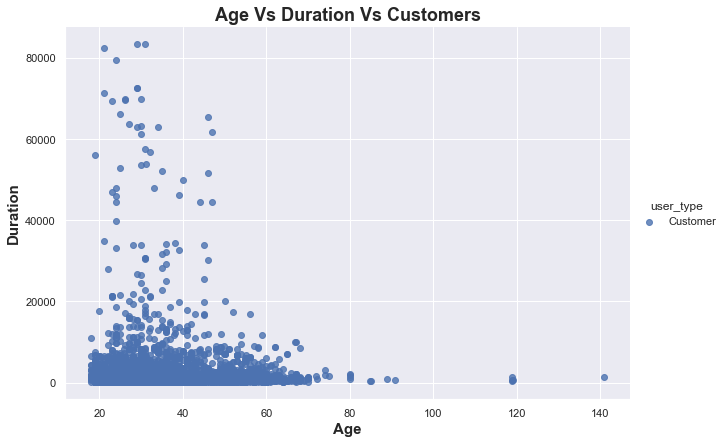

In [54]:
g = sns.FacetGrid(data = df_trip, hue = 'user_type', hue_order=['Customer', ''], height=6, aspect=1.5)
g = g.map(sns.regplot, 'age', 'duration_sec', x_jitter = 0.04, fit_reg = False);
g.add_legend()
label('Age', 'Duration', 'Age Vs Duration Vs Customers')

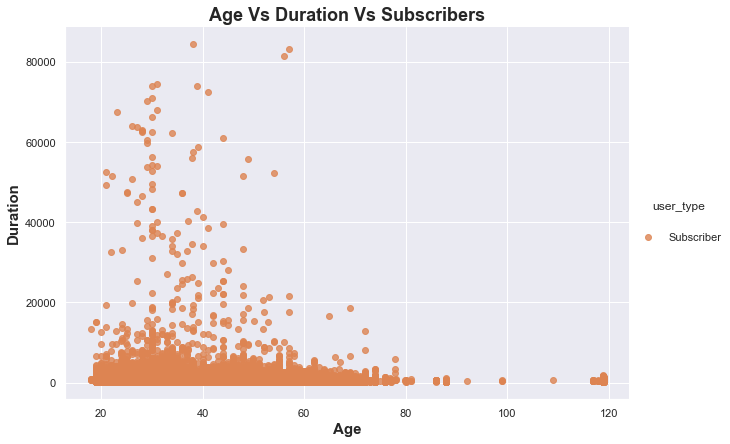

In [55]:
g = sns.FacetGrid(data = df_trip, hue = 'user_type', hue_order=['', 'Subscriber'], height=6, aspect=1.5)
g = g.map(sns.regplot, 'age', 'duration_sec', x_jitter = 0.04, fit_reg = False);
g.add_legend()
label('Age', 'Duration', 'Age Vs Duration Vs Subscribers')

We see a similar trend in both customers and subscriber chat for age and duration regardless of if they are a Subscriber or Customer. We can agree that age has a positive correlation to the duration spent on trips

<a id='conclusions'></a>
## Conclusions

After a careful analysis of the data, i come to a conclusion that active usage of the services is dependant on if one is a Subscriber. i strongly suggest that customers should be persuaded to use the services more by becoming a auscriber to the services. 

 Using the bike sharing system for all trip has no effect on the duration covered on trips.
 
 Likewise Age is a major factor that determine the duration of trips.
 
 


In [56]:
df_trip.to_csv('201902-fordgobike-tripdata_clean.csv')